In [2]:
import os
from os import path, environ
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from loguru import logger
sns.set_style('white')

results_dir = path.join(environ['SIERRA_DATA_PATH'], '../results')

In [3]:
def create_plots(study, var, normalize=False, filters=None):
    
    study_dir = path.join(results_dir, study)
    
    resource, variable, unit = var.split('_')

    perturbations = []
    values = []
    seconds = []

    for scenario_dir in os.listdir(study_dir):
        perturb_name, perturb_val = scenario_dir.split('=')
        perturb_val = int(perturb_val)

        scen_output_dir = path.join(study_dir, scenario_dir, 'stanislaus/historical/Livneh')
        var_path = path.join(scen_output_dir, var + '.csv')
        if not path.exists(var_path):
            logger.info('Skipping {}'.format(var_path))
            continue

        V = pd.read_csv(var_path, index_col=0, header=0, parse_dates=True).loc[:'2009-09-30']
        if filters:
            V = V[filters]

        value_mean_annual = V.sum(axis=1).mean()

        perturbations.append(perturb_val)
        values.append(value_mean_annual)

        # load metadata
        with open(path.join(scen_output_dir, 'log.txt')) as f:
            for lastline in f:
                pass
        if 'seconds' in lastline:
            secs = float(lastline.split('runtime:')[1].strip().split(' ')[0])
            secs_per_year = secs / (V.index[-1].year - V.index[0].year)
            seconds.append(secs_per_year)

    logger.info('finished loading data')

    fig, ax = plt.subplots(figsize=(8, 5))
    ax2 = ax.twinx()

    x = perturbations
    min_values = min(values)
    # y = [((e - min_energy) / min_energy) * 100 for e in energy]
    if normalize:
        y = list(map(lambda x: (x - min_values) / min_values * 100, values))
    else:
        y = values

    sns.lineplot(x=x, y=y, ax=ax, marker='o', label='Annual {}'.format(variable))
    ylabel = '{v} ({u})'.format(v=variable, u='% of min' if normalize else unit)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_xlabel('No. ' + perturb_name, fontsize=12)
    ax.set_xticks(x)
    title = 'Stanislaus basin, perturbation of {}, WY2001-09'.format(perturb_name)
    ax.set_title(title, fontsize=13)
    ax.legend(loc='upper left')
    # ax.set_ylim(0, max(y)*1.1)

    sns.lineplot(x=x, y=seconds, marker='X', color='red', ax=ax2, label='Annual run time')
    ax2.set_ylim(0, max(seconds) + 1)
    ax2.set_ylabel('Time (seconds)', fontsize=12)
    ax2.legend(loc='upper right')

    plt.show()

## Months sensitivity

2021-02-11 22:43:43.275 | INFO     | __main__:create_plots:39 - finished loading data


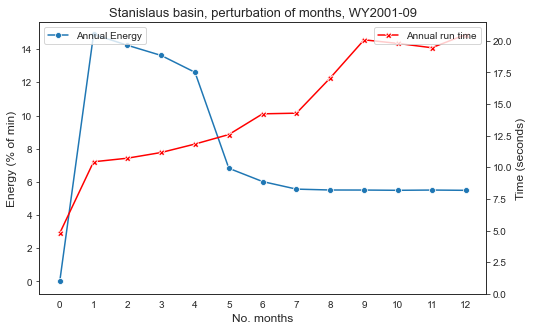

In [4]:
create_plots('Months sensitivity analysis', 'Hydropower_Energy_MWh', normalize=True)

2021-02-11 22:43:47.097 | INFO     | __main__:create_plots:39 - finished loading data


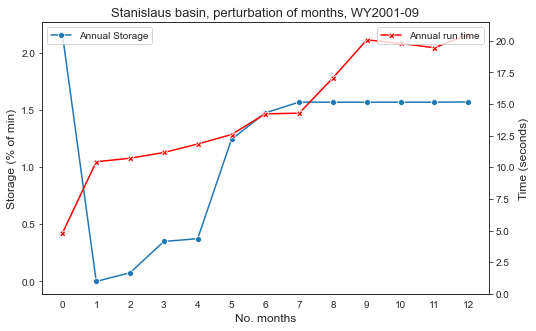

In [8]:
create_plots('Months sensitivity analysis', 'Reservoir_Storage_mcm', normalize=True)

## Blocks sensitivity

2021-02-11 22:43:43.734 | INFO     | __main__:create_plots:39 - finished loading data


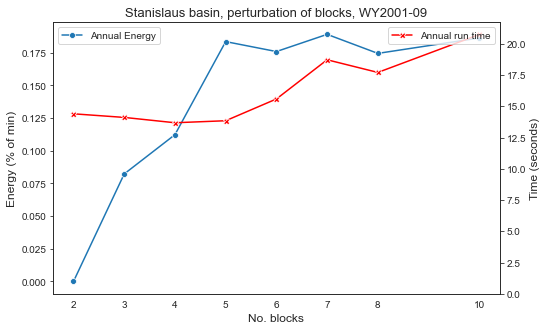

In [5]:
create_plots('Blocks sensitivity analysis', 'Hydropower_Energy_MWh', normalize=True)

2021-02-11 22:43:44.826 | INFO     | __main__:create_plots:39 - finished loading data


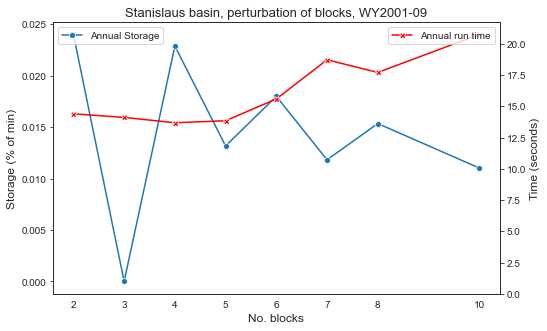

In [6]:
create_plots('Blocks sensitivity analysis', 'Reservoir_Storage_mcm', normalize=True)

2021-02-11 22:43:45.969 | INFO     | __main__:create_plots:39 - finished loading data


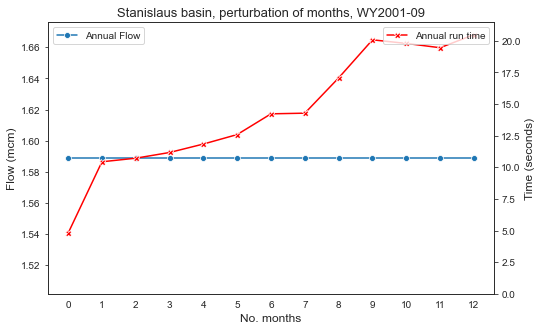

In [7]:
create_plots('Months sensitivity analysis', 'Output_Flow_mcm', filters=['Oakdale Irrigation District', 'South San Joaquin Irrigation District'])